## 5. Vagrant & Linux Servers

Vagrant concepts are useful for cloud computing.

So far, we've been able to:

* VM setup and Linux:

    - Vagrant cloud: vm images
    - Vagrantfile: vm settings
    - Vagrant commands: up, status, ssh, halt, destroy, etc.


### Vagrantfile IP, RAM & CPU

We will work on modifying the `Vagrantfile` inside the vm folders.

The `Vagrantfile` can be open using a text editor (e.g. sublime or notepad) and consists of a number of comments (which start each line with `#`) and the following lines without comments (Ruby script):

    ```
    Vagrant.configure("2") do |config|

        config.vm.box = "ubuntu/jammy64"

    end
    ```

There are some configurations in between which can be uncommented in order to apply new settings, for example:

``` 
# Lines 52-58
config.vm.provider "virtualbox" do |vb|

    vb.memory = "1048"  # (You can increase the memory size of the VM)

end
```

Another one is:

``` 
# Line 40
config.vm.network "public_network" # (Set bridge network interface: fetch IP address from your router randomly)
```

For CentOS, you need to add additional specification:

``` 
# Line 40
config.vm.network "public_network", bridge: "en0: Wi-Fi"
```

What if I need a static IP address?
```
# Line 35
config.vm.network "private_network", ip: "192.168.56.14"
```

We can also add additional settings:

``` 
# Lines 52-58
config.vm.provider "virtualbox" do |vb|

    vb.memory = "1048"  # (You can increase the memory size of the VM)
    vb.cpus = "2"
end
```

IMPORTANT: Once you've made all the changes in the Vagrantfile, save it and you need to reload the VM to apply them: `vagrant reload` inside the vagrant directory.

You can check the new settings when the vm is reloaded:

```
default: Adapter 1: nat
default: Adapter 2: hostonly
default: Adapter 3: bridged
```

And for the memory settings, login to the vm and run:

`free -m` in total mem.

and the cpu:

`cat /proc/cpuinfo` in cpu cores

### Vagrant Sync Directories

After running the command `vagrant up`, the following line appears in the log:

` default: /vagrant => G:/Mi unidad/GitHub/course-devops-udemy/vagrant-vms/ubuntu`

`/vagrant` is the path for the guest directory.

If you add a new file in `G:/Mi unidad/GitHub/course-devops-udemy/vagrant-vms/ubuntu`, it will be immediately synced in the guest directory `/vagrant` inside the vm. -> *sync directory*

Every file within these two directories is automatically syncronised.

We can also mention *our own path for the sync directory* by modifying the `Vagrantfile`:

```
# Line 46
config.vm.synced_folder "../data", "/vagrant_data"
```

You can set any path inside the guest machine, for example: `/opt/scripts` (gets created automatically) and you need to set the synced folder in Windows/Mac:

For Windows:

* Create folder o set the directories to be synced.
* Map the path of this directory using the following syntax (`\\`):
    
    `"F:\\scripts\\shellscripts"`, for example

For Mac:

* Create folder in the desktop
* Map the path using the following syntax (`/`):
    
    `"/Users/username/Desktop/scripts"`

You can have as many synced directories as you want in the Vagrantfile!

**Reasons to use synced directories**:

1. Preserve VM files into the host machine, in case it gets aborted or corrupted

2. Write your scripts/programs in the host machine by using the preferred editor

### Vagrant Provisioning

Provisioning is executing commands or scripts when the VM comes up first time or if the VM is already running by applying provisioning to execute commands or scripts.

Provising can be modified using the Vagrantfile:

```
# Line 66
config.vm.provision "shell", inline: <<-SHELL
    apt-get update
    apt-get install -y apache2
SHELL
```

In a CentOS VM, it should be:

```
# Line 66
config.vm.provision "shell", inline: <<-SHELL
    yum install httpd wget unzip git -y
SHELL
```

Provisioning is only executed only once. If you run `vagrant reload`, it will not execute the provisioning command.

However, you can force provision by running the command `vagrant provision` or the option `vagrant reload --provision`.

### Server Management

* Centos --> `httpd` & HTML template (Manual)

* Ubuntu --> LAMP Stack: Linux, Apache2, Mysql, PHP & Wordpress template (Manual)

* Automation --> Vagrant provisioning

#### Centos & HTML template

HTML templates -> https://www.tooplate.com/ using Brave browser (to avoid ads)

We chose the Finance project: https://www.tooplate.com/view/2135-mini-finance

<ins>Setup Steps</ins>:

1. Choose the project you want to create and find an appropriate template for the webpage in tooplate.

2. Create a VM based on Centos OS using Vagrant in Git Bash:

    - Create a directory for the VM: `mkdir /g/Mi\ unidad/GitHub/course-devops-udemy/vagrant-vms/finance`

    - Go to that directory `cd /g/Mi\ unidad/GitHub/course-devops-udemy/vagrant-vms/finance`

    - Check if you have a vagrant box in your machine by running `vagrant box list`. If you don't have a box for Centos OS, you should download it (https://app.vagrantup.com/eurolinux-vagrant/boxes/centos-stream-9)
    
    - Create the VM by running `vagrant init eurolinux-vagrant/centos-stream-9`

    - Open the Vagrantfile created using Notepad or Sublime. You can also use `vim Vagrantfile`

    - Modify the settings for the VM: 

        * `config.vm.network "private_network", ip: "192.168.56.22"`
        * `config.vm.network "public_network"`
        * `config.vm.provider "virtualbox" do |vb|    vb.memory = "1024"    end`

    - Run `vagrant up`, login `vagrant ssh` and switch to root user `sudo -i`

3. Change the hostname:

    - `vim /etc/hostname`

    - Modify the fist line adding the name, e.g., `finance`, save and quit.

    - Run the command `hostname finance`
    
    - Logout and login again to the root user

4. To setup the website template, we need `httpd`: `yum install httpd -y`. Also, install `wget`, `vim`, `unzip`, `zip`.

5. Start and enable the service: `systemctl start httpd`, `systemctl enable httpd`.

6. Check the IP address: `ip addr show`: It should be any 192... `inet 192.168...`. Try it on the browser: `http://192.168.56.22`, for example. A default httpd webpage should appear.

    - One of the messages in "If you are the website administrator:" part says: "For systems using the Apache HTTP Server: You may now add content to the directory /var/www/html/"

    - Go to `/var/www/html/` (empty) and create a file `vim index.html` (that's the file that is going to be pushed to the browser). You can add a line to the file: "This is my first website setup"

7. Restart the service: `systemctl restart httpd`. **Important**: Whenever you make changes to a service, make sure you restart the service or at least reload it.

8. Refresh the browser and you will find the line that you wrote in the `index.html` file.

9. Download the html template you found in tooplate:

    - Find the dowload button (make sure it downloads a .zip file)

    - Press F12 to inspect the webpage (Brave browser is recommended) and go to Network (at the top). Press the dowload button, but don't save the file. 

    - A .zip file name will appear in the inspect > network window. Select it and go to Headers. A *Request URL* link will appear in General which ends with the .zip extension. Copy it.

    - In the VM, go to `cd /tmp/` (temporary file) to dowload the file. Run `wget https://www.tooplate.com/zip-templates/2135_mini_finance.zip` 

    - Unzip the file: `unzip 2135_mini_finance.zip` and get inside the directory: `cd 2135_mini_finance/`

    - There should be an `index.html` file inside the directory.

    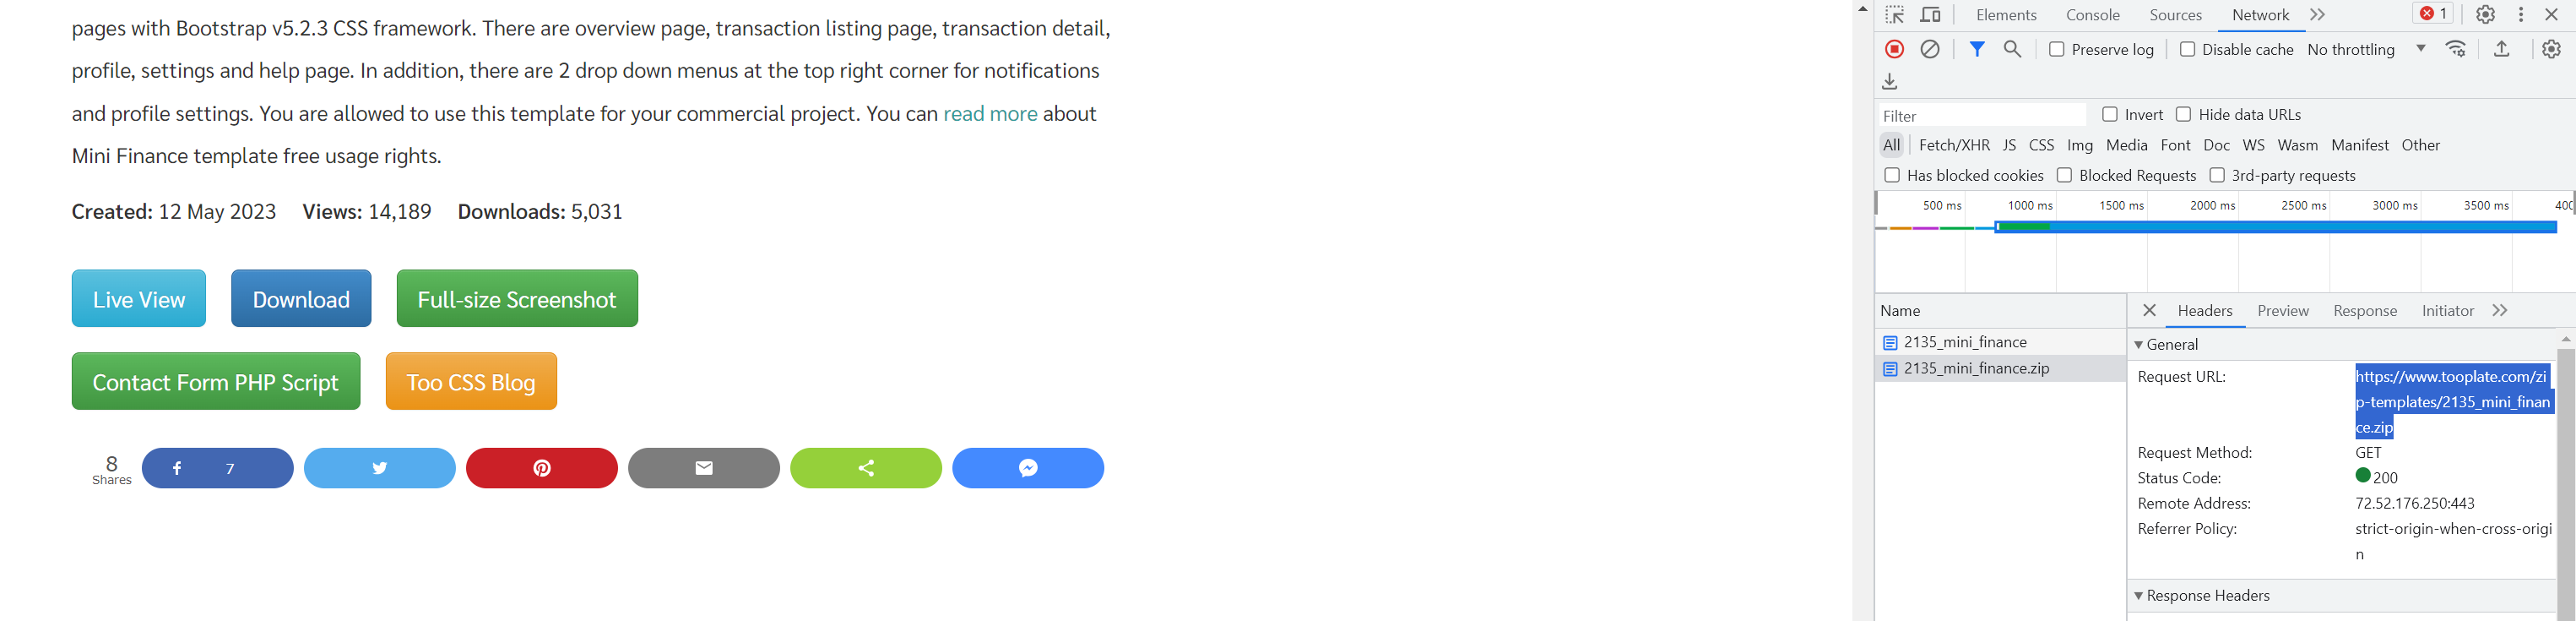
    
10. Set the html template on the IP address:

    - Copy all the content inside the template directory in `/tmp/2135_mini_finance/` and paste it in the `/var/www/html/` directory: `cp -r * /var/www/html/` (`-r` to copy the directories as well). It will ask you if you want to *overwrite* the existing `index.html` file. Write `y`.

    - Check that all the files were correctly copied: `ls /var/www/html/`

    - Restart the service: `systemctl restart httpd`.

    - Validate that the service is running: `systemctl status httpd` and check that all the files are in `/var/www/html/`

    - Check the firewall service: `systemctl status firewalld`. In case it is running or active, stop it: `systemctl stop firewalld`, `systemctl disable firewalld`

    - Go to the IP address on the browser `http://192.168.56.22` and you will find the webpage.

#### Ubuntu LAMP stack & Wordpress template

LAMP Stack -> Linux, Apache2, Mysql & 

Documentation for Wordpress on Ubuntu -> https://ubuntu.com/tutorials/install-and-configure-wordpress#1-overview

* Steps 1-3 mention the requirements (Ubuntu 20) and how to install the required dependencies and wordpress.

* Step 4 in the documentation shows how to configure Apache for Wordpress: the place where we are going to put the HTML template is the DocumentRoot in `/svr/www/wordpress`

* Step 5 shows how to set a Mysql database and users for Wordpress

* Step 6 mentions how to connect Wordpress to the database

<ins>Setup Steps</ins>:

1. Go to https://app.vagrantup.com/boxes/search and search for Ubuntu 20: https://app.vagrantup.com/ubuntu/boxes/focal64. 

    - Copy the name of the box: "ubuntu/focal64"

    - Create a directory for the VM: `/g/Mi\ unidad/GitHub/course-devops-udemy/vagrant-vms/wordpress`

    - Go to the new directory and run `vagrant init ubuntu/focal64`

    - Open the Vagrantfile and modify the settings for the VM:

        * `config.vm.network "private_network", ip: "192.168.56.22"`
        * `config.vm.network "public_network"`
        * `config.vm.provider "virtualbox" do |vb|    vb.memory = "1600"    end`

    - Save and quit the file, and run `vagrant up`, login `vagrant ssh` and switch to the root user `sudo -i`

2. Change the hostname:

    - `vim /etc/hostname`
    
    - Modify the fist line adding the name, e.g., `wordpress`, save and quit.
    
    - Run the command `hostname wordpress`
    
    - Logout and login again to the root user

Now, let's follow the steps from the Ubuntu documentation for wordpress setup. **Important**: Don't copy and paste the commands directly into the terminal. Copy them first in the notepad and from there, copy and paste to the terminal once you are sure. Run line by line.

3. Install PHP and Apache:

    - Run `sudo apt update`

    - Run to install dependencies:
    ```
        sudo apt install apache2 \
                    ghostscript \
                    libapache2-mod-php \
                    mysql-server \
                    php \
                    php-bcmath \
                    php-curl \
                    php-imagick \
                    php-intl \
                    php-json \
                    php-mbstring \
                    php-mysql \
                    php-xml \
                    php-zip -y
    ```

4. Install Wordpress:

    - Run the following lines:
    ```
        sudo mkdir -p /srv/www
        sudo chown www-data: /srv/www
        curl https://wordpress.org/latest.tar.gz | sudo -u www-data tar zx -C /srv/www
    ```

    - Check the directory using `ls -ld /srv/www/` and you will see that it is owned by `www-data` (by the `chown` command before): 

        `drwxr-xr-x 3 www-data www-data 4096 Aug 22 17:22 /srv/www/`

    - You can also check that the directory `wordpress` is created with all the .php files using `ls -l /srv/www/wordpress/`

    - The directory `/svr/www/wordpress/` is going to act in the same way as `/var/www/html/` directory in Centos.

5. Configure Apache for Wordpress:

    - Create the file `wordpress.conf`: `vim /etc/apache2/sites-available/wordpress.conf`

    - Modify it with the following lines, save it and quit:
    ```
        <VirtualHost *:80>
            DocumentRoot /srv/www/wordpress
            <Directory /srv/www/wordpress>
                Options FollowSymLinks
                AllowOverride Limit Options FileInfo
                DirectoryIndex index.php
                Require all granted
            </Directory>
            <Directory /srv/www/wordpress/wp-content>
                Options FollowSymLinks
                Require all granted
            </Directory>
        </VirtualHost>
    ```

    - Run the following lines:
    ```
        sudo a2ensite wordpress
        sudo a2enmod rewrite
        sudo a2dissite 000-default
    ```
        These commands enable the Wordpress site and disabled the default site.
    
    - Then, reload the apache service: `sudo service apache2 reload`

    - Check the directory `ls -l /etc/apache2/sites-enabled/` and you will find a link `l` named `wordpress.conf` which points to a file in the directory `/etc/apache2/sites-available/wordpress.conf`, which contains the Wordpress configuration.

6. Configure database (be careful in this step!):

    - Run `sudo mysql -u root` to log in to the MySQL as the root user. The prompt will change to `mysql>`.

    - Create the database: `CREATE DATABASE wordpress;`. You can check by running `SHOW DATABASES;`. **Important**: SQL queries end with semicolon (`;`).

    - Create the wordpress user at localhost, identified with a given password: `CREATE USER wordpress@localhost IDENTIFIED BY '12345';`. REMEMBER to change the password if you need to.
    
    - Grant privileges to this user: `GRANT SELECT, INSERT, UPDATE, DELETE, CREATE, DROP, ALTER ON wordpress.* TO wordpress@localhost;`

    - Refresh everything: `FLUSH PRIVILEGES;` and quit: `quit`. Command prompt should come back to root user and `#`.

7. Configure Wordpress to connect to the database:

    - Run to copy the sample configuration: `sudo -u www-data cp /srv/www/wordpress/wp-config-sample.php /srv/www/wordpress/wp-config.php`

    - Search and replace (`sed`) the configuration file. **Important**: The password in the third line should match the password given when configuring the wordpress user `...IDENTIFIED BY '12345'`
    ```
        sudo -u www-data sed -i 's/database_name_here/wordpress/' /srv/www/wordpress/wp-config.php
        sudo -u www-data sed -i 's/username_here/wordpress/' /srv/www/wordpress/wp-config.php
        sudo -u www-data sed -i 's/password_here/12345/' /srv/www/wordpress/wp-config.php
    ```

    - You can validate the information by opening the file: `vim /srv/www/wordpress/wp-config.php`

    - Open the configuration file: `sudo -u www-data vim /srv/www/wordpress/wp-config.php` and find the following lines inside the file:
    ```
        define( 'AUTH_KEY',         'put your unique phrase here' );
        define( 'SECURE_AUTH_KEY',  'put your unique phrase here' );
        define( 'LOGGED_IN_KEY',    'put your unique phrase here' );
        define( 'NONCE_KEY',        'put your unique phrase here' );
        define( 'AUTH_SALT',        'put your unique phrase here' );
        define( 'SECURE_AUTH_SALT', 'put your unique phrase here' );
        define( 'LOGGED_IN_SALT',   'put your unique phrase here' );
        define( 'NONCE_SALT',       'put your unique phrase here' );
    ```

    - Replace these lines with the content of https://api.wordpress.org/secret-key/1.1/salt/, then save and quit:
    ```
        define('AUTH_KEY',         '@S>.xD]Ox#&BCt.u|rw{kK*t:_-?bHZ0h*a5XBw9t~=;}.Lfp |QUeB[Z#Y_7iKP');
        define('SECURE_AUTH_KEY',  '6Vn1;s9F/jG[usOC-DSN5)q8UL|MO1R4&tAW@O},{Qa@AL`X5dsu3t<c6+j9Gj~:');
        define('LOGGED_IN_KEY',    'D,puh/TJ6 icwK-7[JAGcH1.|wgif)bq:(:S]o5v<y]|PLee%LvQ?ImBvC#5xbO)');
        define('NONCE_KEY',        'sM{=o.sp2@|1Y_czH6C3|,C3*RKbL?_LNh@C1h=`JtKRQ;+8pEy;B>RD5hRRD,ln');
        define('AUTH_SALT',        'sI{=ywB##-^3h~b+N/y<6]8A)cRSHu K8D~69?~[=D OszT||Ho;*!|+fzg_h-o3');
        define('SECURE_AUTH_SALT', '(}LLLa9f,4X+:5>rb0C5:^+k[CMmKY{$m]R_9Z6<Bz~-m]Z6.O3}/-)t},|~R*HC');
        define('LOGGED_IN_SALT',   'zEjtF<=jyK,8sJ8DVi(gLk;2AZ}vj`] xPTx_7j+/90D<?D$^R@VG-hM/{Q$@SF*');
        define('NONCE_SALT',       ' JTbJE;B?= {=?%6b_;C)5|;<!D}O9ZDf>5#{rdeLYPzITO:K>`$h0UG?Erk,Ra:');
    ```

8. Configure Wordpress to the IP address:

    - Find the IP address: `ip addr show` and enter it in the browser: `192.168.56.26`. You should see the Wordpress setup page. Select language and continue.

    - Fill out the required information and click on Install Wordpress: 

        * Site title: devops
        * Username: scaceresg
        * Password, use given by the page (a&Yq&W@Loql#*ZQy*%)
        * Your email: sebastian.caceres.g@hotmail.com

    - Log in and you will see the Welcome to Wordpress! page.

#### Automated Website Setup

Automation -> Vagrantfile with the provision of the website

We will do this for both finance (Centos) and wordpress (Ubuntu) projects.

**For Centos**

In VS Code:

* Open the `vagrant-vms` directory.

* Create a copy of the `finance` folder and rename it `financeIAC` (IAC: Infrastructure As Code)

* Inside `financeIAC`, remove the `.vagrant` folder and open the `Vagrantfile`

* Change the IP address of the private network so it doesn't match that from other VMs: `config.vm.network "private_network", ip: "192.168.56.28"`

* Go down to the provisioning section of the file and add all the commands used to set up the finance webpage manually. **Important**: In the provisioning, make sure you add the `-y` option so the machine does not request permission or confirmation, which will make the setup to fail. Insert the following commands inside the `config.vm.provision` section

    ```
        yum install httpd wget unzip vim -y

        systemctl start httpd
        systemctl enable httpd

        mkdir -p /tmp/finance # -p to overwrite the directory if already exists
        cd /tmp/finance

        wget https://www.tooplate.com/zip-templates/2135_mini_finance.zip
        unzip -o 2135_mini_finance.zip # -o to overwrite the file if already exists
        cp -r 2135_mini_finance/* /var/www/html/ # -r to copy the directories (recursively)

        systemctl restart httpd

        cd /tmp/
        rm -rf /tmp/finance
    ```

In Git Bash:

* Setup the VM as we've learned:

    ```
        cd /g/Mi\ unidad/GitHub/course-devops-udemy/vagrant-vms/financeIAC/
        vagrant up
    ```

In the browser:

* Go to the IP address of the VM: `http://192.168.56.28`. You will find the template running correctly.

**Important**: The Vagrantfile with the provisioning section is very important in AWS setup.

**For Ubuntu**:

Similar to Centos:

In VS Code:

* Open the `vagrant-vms` directory.

* Create a copy of the `wordpress` folder and rename it `wordpressIAC` (IAC: Infrastructure As Code)

* Inside `wordpressIAC`, remove the `.vagrant` folder and open the `Vagrantfile`

* Change the IP address of the private network so it doesn't match that from other VMs: `config.vm.network "private_network", ip: "192.168.56.28"`

* Go down to the provisioning section of the file and add all the commands used to set up the finance webpage manually. **Important**: In the provisioning, make sure you add the `-y` option so the machine does not request permission or confirmation, which will make the setup to fail. Insert the following commands inside the `config.vm.provision` section

    ```
        sudo apt update
        sudo apt install apache2 \ # install dependencies
                        ghostscript \
                        libapache2-mod-php \
                        mysql-server \
                        php \
                        php-bcmath \
                        php-curl \
                        php-imagick \
                        php-intl \
                        php-json \
                        php-mbstring \
                        php-mysql \
                        php-xml \
                        php-zip -y
        
        sudo mkdir -p /srv/www # install wordpress
        sudo chown www-data: /srv/www
        curl https://wordpress.org/latest.tar.gz | sudo -u www-data tar zx -C /srv/www
        
        cat > /etc/apache2/sites-available/wordpress.conf <<EOF # NEW! Create wordpress.conf file and add the document root for config.
    <VirtualHost *:80>
            DocumentRoot /srv/www/wordpress
            <Directory /srv/www/wordpress>
                Options FollowSymLinks
                AllowOverride Limit Options FileInfo
                DirectoryIndex index.php
                Require all granted
            </Directory>
            <Directory /srv/www/wordpress/wp-content>
                Options FollowSymLinks
                Require all granted
            </Directory>
    </VirtualHost>
    EOF # EOF should not have any spaces at the beginning or end of the EOF to avoid errors (check Vagrantfile)
        
        sudo a2ensite wordpress # enable site and disable default page
        sudo a2enmod rewrite
        sudo a2dissite 000-default
        
        mysql -u root -e 'CREATE DATABASE wordpress;' # NEW! run mysql commands adding -e and the whole command at the beginning
        mysql -u root -e 'CREATE USER wordpress@localhost IDENTIFIED BY "12345";' # changed '' for "" in the password
        mysql -u root -e 'GRANT SELECT,INSERT,UPDATE,DELETE,CREATE,DROP,ALTER ON wordpress.* TO wordpress@localhost;'
        mysql -u root -e 'FLUSH PRIVILEGES;'
        
        sudo -u www-data cp /srv/www/wordpress/wp-config-sample.php /srv/www/wordpress/wp-config.php # connect wp to database
        
        sudo -u www-data sed -i 's/database_name_here/wordpress/' /srv/www/wordpress/wp-config.php # set database credentials
        sudo -u www-data sed -i 's/username_here/wordpress/' /srv/www/wordpress/wp-config.php
        sudo -u www-data sed -i 's/password_here/12345/' /srv/www/wordpress/wp-config.php
        
        systemctl restart mysql
        systemctl restart apache2
    ```

In Git Bash:

* Setup the VM as we've learned:

    ```
        cd /g/Mi\ unidad/GitHub/course-devops-udemy/vagrant-vms/wordpressIAC/
        vagrant up
    ```

In the browser:

* Go to the IP address of the VM: `http://192.168.56.28`. You will find the template running correctly.

**Important**: The Vagrantfile with the provisioning section is very important in AWS setup.

### Multi VM Vagrantfile

It's very convenient to manage multiple VMs together from one single vagrant file: avoids multiple folders and commands.

This is very useful when running an application stack that needs multiple services running in multiple VMs:

* e.g., database, application, frontend running in different VMs and together they form a single application

If you check the Vagrant Cloud Documentation (https://developer.hashicorp.com/vagrant/docs), in the Multi-Machine section, you will find an example for a multi-Vagrantfile:

```
Vagrant.configure("2") do |config|
  config.vm.provision "shell", inline: "echo Hello"

  config.vm.define "web" do |web|
    web.vm.box = "apache"
  end

  config.vm.define "db" do |db|
    db.vm.box = "mysql"
  end
end

```

The `config.vm.define` lines allow to create multiple VMs where we can provision any settings.

This implies some work, but we can support ourselves using text generation tools such as *ChatGPT*. But, for this course, in order for you to learn, you would need to write all the scripts and configuration files.

Let's create a new directory (folder) in the `vagrant-vms` directory and create a new file `Vagrantfile` with the following content:

```
Vagrant.configure("2") do |config|
    # Web01 VM
    config.vm.define "web01" do |web01|
      web01.vm.box = "ubuntu/focal64"
      web01.vm.hostname = "web01"
      web01.vm.network "private_network", ip: "192.168.56.41"
    end
  
    # Web02 VM
    config.vm.define "web02" do |web02|
      web02.vm.box = "ubuntu/focal64"
      web02.vm.hostname = "web02"
      web02.vm.network "private_network", ip: "192.168.56.42"
    end
  
    # DB01 VM
    config.vm.define "db01" do |db01|
      db01.vm.box = "centos/7"
      db01.vm.hostname = "db01"
      db01.vm.network "private_network", ip: "192.168.56.43"
      
      # Provisioning using a shell script
      db01.vm.provision "shell", inline: <<-SHELL
        yum install -y wget unzip mariadb-server
        systemctl start mariadb
        systemctl enable mariadb
      SHELL
    end
  end
```

The file contains the definition of 3 VMs: web01 (Ubuntu20), web02 (Ubuntu20) & db01 (Centos7), and includes provisioning for the db01.

**Important**: Make sure that all the VMs have a given name (e.g., "web01") and that their IP address is different between them.

* In Git Bash:

  - Go to the `Vagrantfile` directory and run `vagrant up`

  - Log in using `vagrant ssh vmname`, where vmname is the name given to the VM you want to access.

  - Also, if you want to power up, power off or destroy a specific VM, you need to add the vmname. `vagrant up`, `vagrant halt` and `vagrant destroy` will power up, power off or destroy all the VMs at the same time.